#### <b>Importing libraries</b>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Importing 'orders_products_combined' from the 'Prepared data' folder

path = r'C:\Users\andd0\Documents\InstaCart Basket Analysis'

In [4]:
# Importing the latest dataframe (exported in Exercise 4.8)

merged_project_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_Task_4_8.pkl'))

In [5]:
# Taking a look at the import dataframe

merged_project_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend_user,spending_flag,ord_regularity_median,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regular days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [6]:
merged_project_data.shape

(32434212, 26)

<Axes: xlabel='orders_day_of_week'>

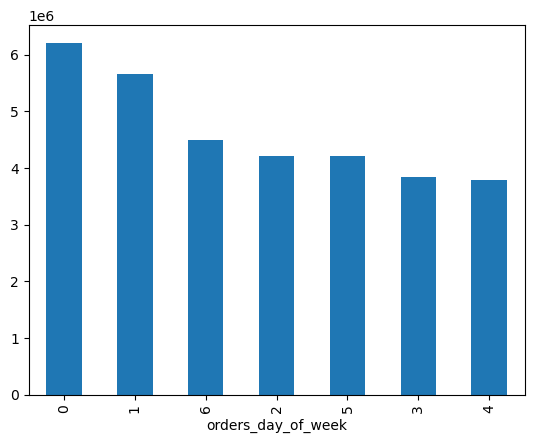

In [7]:
merged_project_data['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

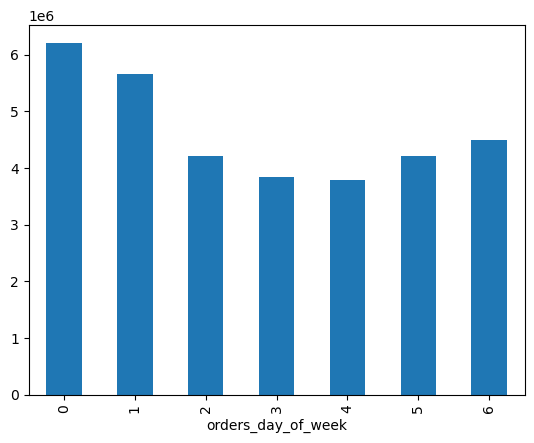

In [8]:
# Code to show the bars according to their index order: Add the function sort_index() to the code

merged_project_data['orders_day_of_week'].value_counts().sort_index().plot.bar()

#### <b>When to use 'sort_index()'?></b>

##### This can be useful if the data would be easier to understand in its original order.

##### Example, days of the week or months of the year would be better understood if they were listed chronologically.

#### <b>Adding colors</b>

<Axes: xlabel='orders_day_of_week'>

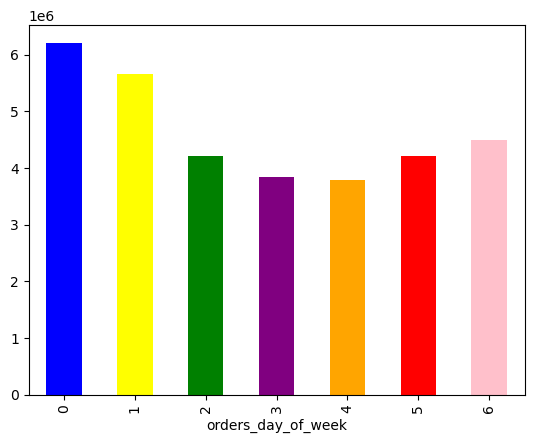

In [12]:
merged_project_data['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue', 'yellow', 'green', 'purple', 'orange', 'red', 'pink'])

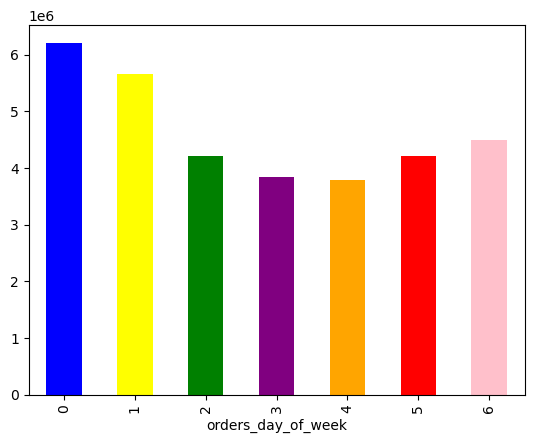

In [13]:
bar = merged_project_data['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue', 'yellow', 'green', 'purple', 'orange', 'red', 'pink'])

#### <b>Exporting the visualization</b>

In [15]:
# For this purpose, we use the function figure.savefig()

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### <b>Histograms and Scatterplots</b>

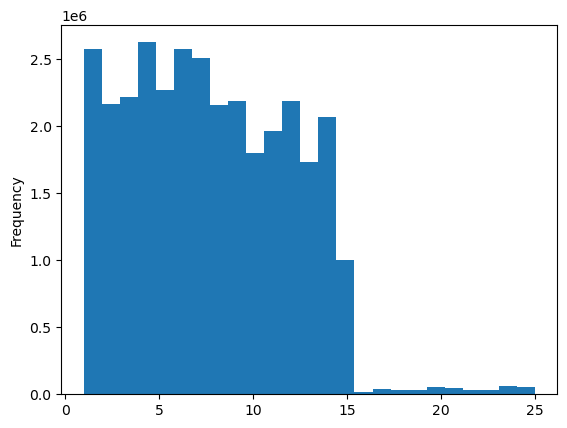

In [17]:
# Histogram:

hist = merged_project_data['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

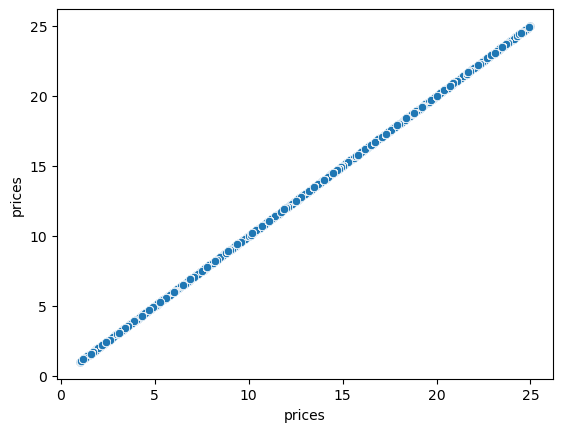

In [18]:
# Scatterplot:

sns.scatterplot(x = 'prices', y = 'prices',data = merged_project_data)

#### Checking values above $100

In [20]:
merged_project_data.loc[merged_project_data['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend_user,spending_flag,ord_regularity_median,frequency_flag


#### Note: I corrected the outliers issue in the previous exercise.

In [22]:
# Checking what the 'prices' max value is:

merged_project_data['prices'].max()

25.0

#### Exporting the histogram

In [24]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

#### <b>Sampling</b>

In [42]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

np.random.seed(4)

dev = np.random.rand(len(merged_project_data)) <= 0.7

In [44]:
# Store 70% of the sample in the dataframe 'big'

big = merged_project_data[dev]

In [45]:
# Store 30% of the sample in the dataframe 'small'

small = merged_project_data[~dev]

#### Checking results

In [48]:
len(merged_project_data)

32434212

In [50]:
len(big) + len(small)

32434212

#### Storing in a variable the columns relevant for this visualization

In [54]:
df_2 = small[['orders_day_of_week', 'prices']]

#### Creating the chart

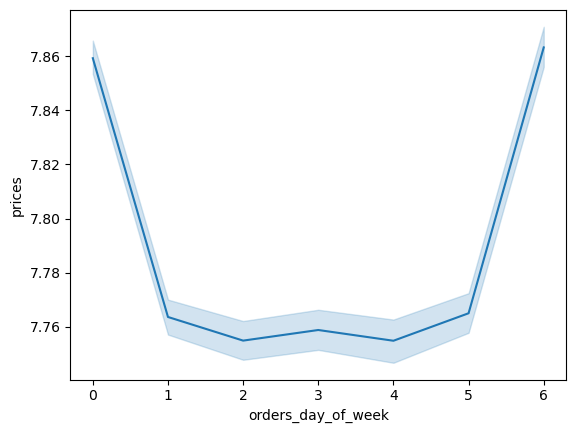

In [57]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')